# Week 7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Day 1: Linear Regression
The setting is as follows: we have some **numerical** data that can be split into two parts:
* **Response** or **target** variable: a single variable for which we want to make construct a model with the goal of making predictions. This variable is stored in a vector-column and is usually labeled by $y$
* **Explanatory** or **input** variables: variables based on which we want to be making the predictions. These variables are usually stored in a matrix $\left[ x_1, x_2, \ldots, x_n \right]$ with each column corresponding to a variable, and the matrix is usually labeled by $X$

If *it makes sense*, then we could construct a linear model for the data:
\begin{equation}\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_n x_n\end{equation}
where $w = \left[w_1, w_2, \ldots, w_n\right]$ are some **weights** that scale the input variables $x_i$. The model is traditionally build with a **least squares** approach: to find the optimal weights, we minimize the sum of the squared differences between the actual data and what the model predicts for it. In mathematical terms:
\begin{equation} \min_{w} || X w - y||_2^2 \end{equation}

We will first start with a linear model that has one input variable $x$ and an output variable $y$. The model simplifies to :
\begin{equation} \hat{y} = w_0 + w_1 x \end{equation}

We will look at ways to display the data, assess the model, and make predictions

### Example 1
Armand’s Pizza Parlors is a chain of Italian-food restaurants located in a five-state area. Armand’s most successful locations are near college campuses. The managers believe that quarterly sales for these restaurants ($y$) are related positively to the size of the student population ($x$); that is, restaurants near campuses with a large student population tend to generate more sales than those located near campuses with a small student population. Using regression analysis, we can develop an equation showing how the dependent variable $y$ is related to the independent variable $x$. The data is given in `armand_pizza.csv`
* Develop a scatter plot & comment on the nature of the relatioship
* Build the linear model $\hat{y} = w_0 + w_1 x$. Use it to predict the values for $x=5$, $x=8$ and $x=20$
* Calculate the residuals using the formula: 
$$\text{resid} = \text{observed} - \text{predicted} = y - \hat{y}$$
* Make a residual plot -- the scatter plot of residuals against $x$-values or against the predicted $\hat{y}$-values.
* Calculate the correlation coefficient $r$ for the association between the student population & the pizza sales.
* Calculate the determination coefficient $r^2$ and interpret its meaning.

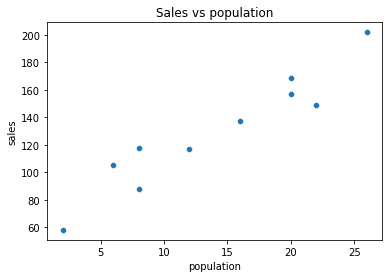

There is a fairly strong linear pattern in the data


In [2]:
# Load the data
df = pd.read_csv('armand_pizza.csv')

plt.figure()
sns.scatterplot(x='population', y='sales', data=df)
plt.title('Sales vs population')
plt.show()

print('There is a fairly strong linear pattern in the data')

In [3]:
# Build the model
X = np.array(df['population']).reshape(-1, 1)
y = df['sales']

model = LinearRegression()
model.fit(X, y)

print('w_0 = ', model.intercept_)
print('w_1 = ', model.coef_)
print(f'The model is y-hat = {model.intercept_} + {model.coef_[0]}x')

# Make predictions for x = 5, 8, 20
inputs = np.array([5, 8, 20]).reshape(-1,1)
predictions = model.predict(inputs)
for i in range(len(inputs)):
    print(f'x = {inputs[i]}, y-hat = {predictions[i]}')

w_0 =  60.0
w_1 =  [5.]
The model is y-hat = 60.0 + 5.0x
x = [5], y-hat = 85.0
x = [8], y-hat = 100.0
x = [20], y-hat = 160.0


0   -12.0
1    15.0
2   -12.0
3    18.0
4    -3.0
5    -3.0
6    -3.0
7     9.0
8   -21.0
9    12.0
Name: sales, dtype: float64


<AxesSubplot:xlabel='sales', ylabel='Count'>

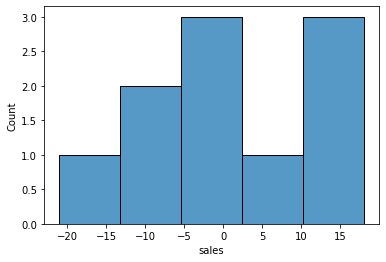

In [4]:
# Calculate the residuals
pred = model.predict(X)
resid = y - pred

print(resid)

sns.histplot(resid)

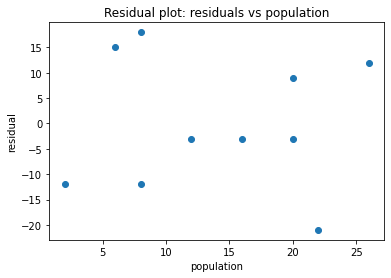

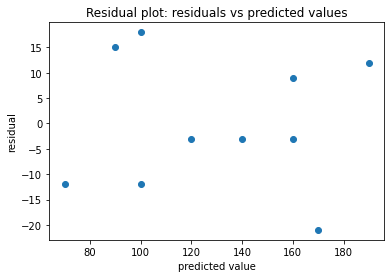

There is no obvious pattern in the residual plots


In [5]:
# Make a residual plot

plt.figure()
plt.scatter(X, resid)
plt.xlabel('population')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs population')
plt.show()

plt.figure()
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

print('There is no obvious pattern in the residual plots')

In [6]:
# Calculate r and r^2
r_sq = model.score(X, y)
r = np.sqrt(r_sq)
print('Correlation coefficient: r = ', r)
print('Determination coefficient: r^2 = ', r_sq)

Correlation coefficient: r =  0.9501229552044079
Determination coefficient: r^2 =  0.9027336300063573


### Example 2
The *Toyota Camry* is one of the best-selling cars in North America. The cost of a previously owned Camry depends upon many factors, including the model year, mileage, and condition. To investigate the relationship between the car's mileage and the sales price for a 2007 model year Camry, the data in `camry.csv` shows the mileage and sale price for 19 sales.
* Develop a scatter diagram with the car mileage on the horizontal axis and the price on the vertical axis. Interpret the relationship between the variables
* Develop the estimated regression equation that could be used to predict the price (1000s of dollars) given the miles (also in 1000s).
* Does the estimated regression model provide a good fit? Explain.
* Provide an interpretation for the slope and for the intercept of the estimated regression equation.
* Suppose that you are considering purchasing a previously owned 2007 Camry that has been driven 60,000 miles. Using the estimated regression model, predict the price for this car.

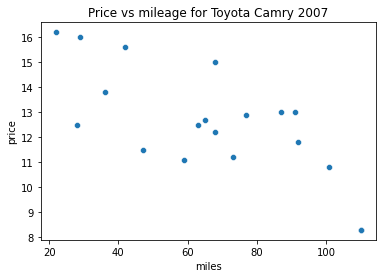

In [7]:
# Load the data
df = pd.read_csv('camry.csv')


# Make a scatter plot
plt.figure()
sns.scatterplot(x='miles', y='price', data=df)
plt.title('Price vs mileage for Toyota Camry 2007')
plt.show()

In [8]:
# Constructing the model
X = np.array(df['miles']).reshape(-1, 1)
y = np.array(df['price']).reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)
slope = np.round(model.coef_[0], 2)
intercept = np.round(model.intercept_, 2)
print(f'The model is: y-hat = {intercept} + {slope}x')
# Slope = -0.06 means that on average with every additional 1000 miles, the price decreases by 0.06 $1000
# Intercept = 16.47, so a Camry that has mileage=0 would cost 16.47 $1000 on average

The model is: y-hat = [16.47] + [-0.06]x


r-sq =  0.5386573970074373
r =  0.733932828675375


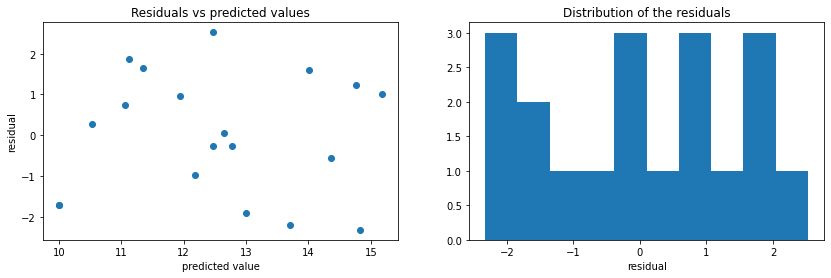

There is no pattern in the residual plot, and there are no outliers in the distribution of the residuals
The model is overall a good fit


In [9]:
# Establishing if the model is good
# Use r^2 and residuals
r_sq = model.score(X, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

pred = model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()

print('There is no pattern in the residual plot, and there are no outliers in the distribution of the residuals\nThe model is overall a good fit')

In [10]:
# Making a prediction about a Camry with 60,000 miles
x_0 = np.array([60]).reshape(-1,1)
y_0 = model.predict(x_0)

print('A Camry with 60,000 miles would cost, on average, $', np.round(1000*y_0[0], 0))

A Camry with 60,000 miles would cost, on average, $ [12943.]


### Example 3
Data in `body_fat.csv` contains info about body fat (in percent of weight), height, waist size, and chest size (all in cm) for a large sample of people.
* Load the data and visualize the dataset using `seaborn.pairplot()`
* Build a model for the percent of body fat using height, waist size and chest size as independent variables.
* Decide whether the model is appropriate by considering $r^2$ and the residual plot.
* Can this model be improved?

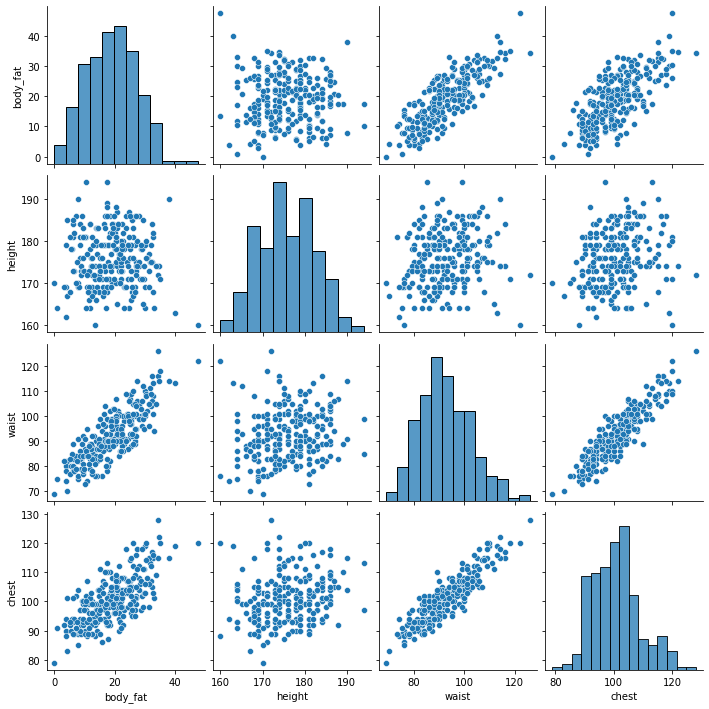

In [11]:
# Reading the data
df = pd.read_csv('body_fat.csv')

# Visualize the dataset
sns.pairplot(data=df)

In [12]:
# Building the model
X = df[['height', 'waist', 'chest']]
y = df['body_fat']

model = LinearRegression()
model.fit(X, y)

intercept = np.round(model.intercept_, 3)
coef = np.round(model.coef_, 3)
print('The intercept is: ', intercept)
print('The coefficients are: ', coef)
print(f'The model is:\nBody Fat = {intercept} + {coef[0]}*{X.columns[0]} + {coef[1]}*{X.columns[1]} + {coef[2]}*{X.columns[2]}')

The intercept is:  1.53
The coefficients are:  [-0.224  0.85  -0.214]
The model is:
Body Fat = 1.53 + -0.224*height + 0.85*waist + -0.214*chest


r-sq =  0.7176822522451751


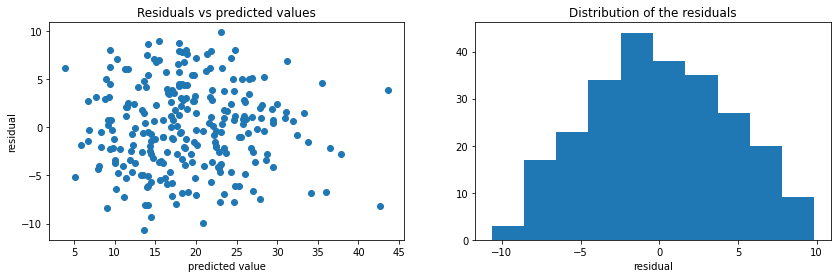

No pattern in the residual plot, no outliers in the distribution of the residuals
The model is appropriate


In [13]:
# Evaluating the model
r_sq = model.score(X, y)
print('r-sq = ', r_sq)

# Residuals ans stuff
pred = model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()

print('No pattern in the residual plot, no outliers in the distribution of the residuals')
print('The model is appropriate')

### Example 4
The data in `life_expectancy.csv` contains information on various measures of the 50 United States:
* the Murder rate per 100,000 inhabitants
* High School Graduation rate in percent
* Income is per capita income in dollars
* Illiteracy rate per 1000 inhabitants
* Life Expectancy in years.

Build a linear regression model for *Life Expectancy* as a response (dependent) variable, using the remaining variables as input variables.

,state,life_expectancy,murder_rate,graduation_rate,income,illiteracy
0,Alabama,74.4,7.6,62,27557,0.15
1,Alaska,77.1,4.1,67,34316,0.09
2,Arizona,77.5,6.3,59,28088,0.13
3,Arkansas,75.2,5.7,72,25563,0.14
4,California,78.2,5.8,68,35352,0.23


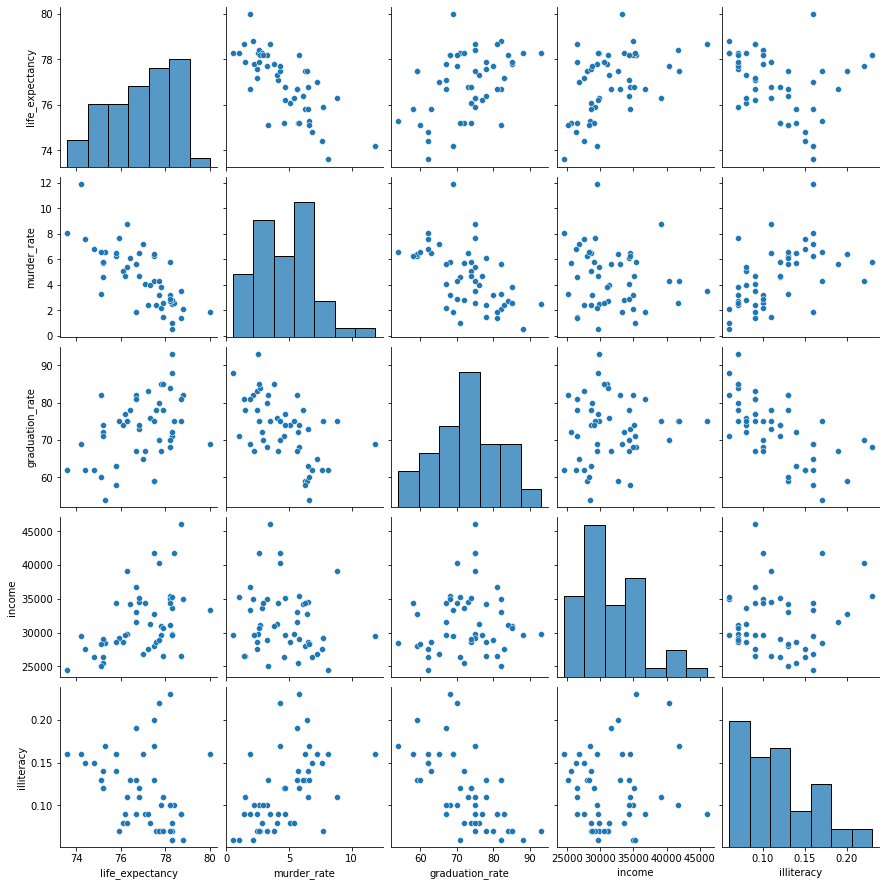

In [14]:
# Load the data
df = pd.read_csv('life_expectancy.csv')
display(df.head())

sns.pairplot(data=df)

In [15]:
# Build the model
y = df['life_expectancy']
X = df[['murder_rate', 'graduation_rate', 'income', 'illiteracy']]

model = LinearRegression()
model.fit(X, y)

intercept = np.round(model.intercept_, 5)
coef = np.round(model.coef_, 5)
print('The intercept is: ', intercept)
print('The coefficients are: ', coef)
print(f'The model is:\nLife Exp = {intercept} + {coef[0]}*{X.columns[0]} + {coef[1]}*{X.columns[1]} + {coef[2]}*{X.columns[2]} + {coef[3]}*{X.columns[3]}')

The intercept is:  75.04524
The coefficients are:  [-4.23240e-01  3.53000e-03  1.10000e-04  1.67446e+00]
The model is:
Life Exp = 75.04524 + -0.42324*murder_rate + 0.00353*graduation_rate + 0.00011*income + 1.67446*illiteracy


r-sq =  0.6847976467162582


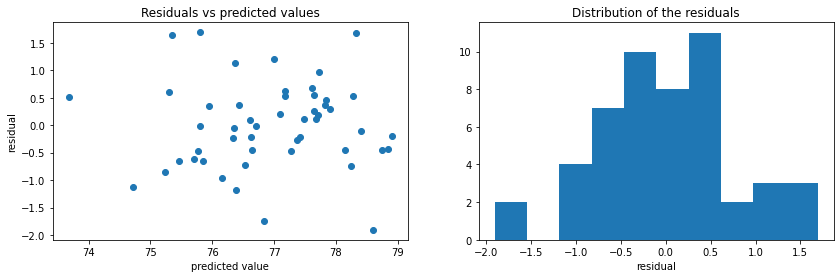

No pattern in the residual plot, no outliers in the distribution of the residuals
The model is appropriate


In [16]:
# Evaluating the model
r_sq = model.score(X, y)
print('r-sq = ', r_sq)

# Residuals ans stuff
pred = model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()

print('No pattern in the residual plot, no outliers in the distribution of the residuals')
print('The model is appropriate')

In [17]:
X_0 = np.array([[4.45, 74, 30246, 0.11]])
y_0 = model.predict(X_0)
print('X_0 = ', X_0)
print('y_0 = ', y_0)

X_0 =  [[4.4500e+00 7.4000e+01 3.0246e+04 1.1000e-01]]
y_0 =  [76.84024448]


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)

intercept = np.round(model_scaled.intercept_, 5)
coef = np.round(model_scaled.coef_, 5)
print('The intercept is: ', intercept)
print('The coefficients are: ', coef)
print(f'The model is:\nLife Exp = {intercept} + {coef[0]}*{X.columns[0]} + {coef[1]}*{X.columns[1]} + {coef[2]}*{X.columns[2]} + {coef[3]}*{X.columns[3]}')

The intercept is:  76.934
The coefficients are:  [-0.97099  0.02984  0.49642  0.0714 ]
The model is:
Life Exp = 76.934 + -0.97099*murder_rate + 0.02984*graduation_rate + 0.49642*income + 0.0714*illiteracy


r-sq =  0.6847976467162574


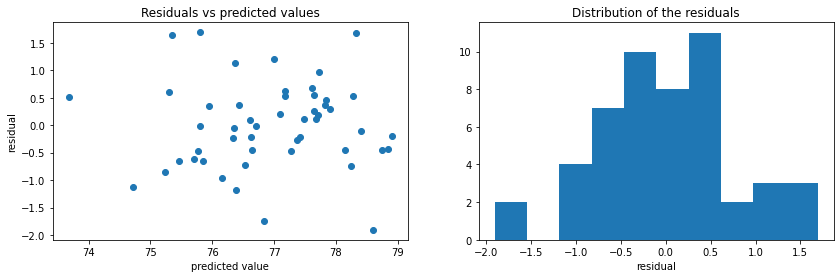

No pattern in the residual plot, no outliers in the distribution of the residuals
The model is appropriate


In [19]:
# Evaluating the model
r_sq = model_scaled.score(X_scaled, y)
print('r-sq = ', r_sq)

# Residuals ans stuff
pred = model_scaled.predict(X_scaled)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()

print('No pattern in the residual plot, no outliers in the distribution of the residuals')
print('The model is appropriate')

In [20]:
X_0_scaled = scaler.transform(X_0)
y_0_scaled = model_scaled.predict(X_0_scaled)
print('X_0_scaled = ', X_0_scaled)
print('y_0_scaled = ', y_0_scaled)

X_0_scaled =  [[-0.06102376  0.13487545 -0.29407172 -0.15477273]]
y_0_scaled =  [76.84024448]


### Example 5: fake linear relationship
A substance is slowly dissolving in acid. The data in `acid_solution.csv` contains measurements of the time (in minutes) after the start of the process, and percent of the substance that has dissolved by that time.
Is there evidence that there is a linear relationship between time passed and the percent of dissolved substance?

,time,percent_dissolved
0,1.0,0.68
1,1.1,1.14
2,1.2,1.72
3,1.3,1.59
4,1.4,1.75


<AxesSubplot:xlabel='time', ylabel='percent_dissolved'>

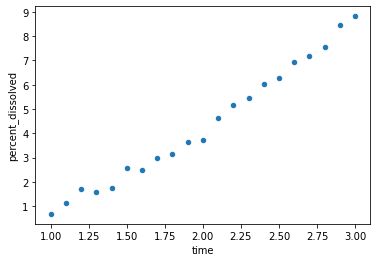

In [21]:
# Load data
df = pd.read_csv('acid_solution.csv')
display(df.head())

df.plot(x='time', y='percent_dissolved', kind='scatter')

In [22]:
# Build the model
X = np.array(df['time']).reshape(-1, 1)
y = np.array(df['percent_dissolved'])

model = LinearRegression().fit(X, y)

slope = np.round(model.coef_[0], 2)
intercept = np.round(model.intercept_, 2)
print(f'The model is: % dissolved = {intercept} + {slope}*time')

The model is: % dissolved = -3.66 + 4.02*time


r-sq =  0.9846171141722794
r =  0.9922787482216272


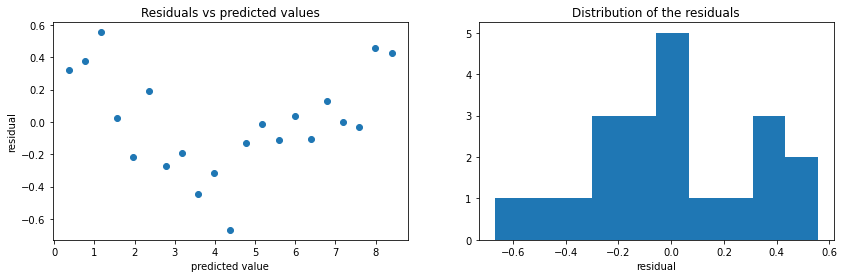

The residual plot shows a strong pattern, so the model is not appropriate!


In [23]:
# Establishing if the model is good
# Use r^2 and residuals
r_sq = model.score(X, y)
print('r-sq = ', r_sq)
print('r = ', np.sqrt(r_sq))

pred = model.predict(X)
resid = y - pred

# Residual plot and the distribution of the residuals
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residuals vs predicted values')

plt.subplot(1, 2, 2)
plt.hist(resid)
plt.xlabel('residual')
plt.title('Distribution of the residuals')
plt.show()

print('The residual plot shows a strong pattern, so the model is not appropriate!')